Second Spacy class session for first week. 

Identify parts of speach and name entity
How to use these extractions for downstream tasks

In [36]:
import os
import spacy
from spacy import displacy

# load english spacy model

nlp = spacy.load('en_core_web_sm')

# prepare doc container

with open('wiki_us.txt', 'r') as f:  # can also write (../ithaka/wiki_us_txt')  what is the difference
    us_text = f.read()

doc = nlp(us_text)




Sentence Boundary Detection - identification of sentences in a text. Better than using split()

In [3]:
doc.sents # view the generator object

In [ ]:
# access sentences in doc container

for sent in doc.sents: # if adding () get a generator not callable error
    print(sent)
    print() # add whitespace between sentences

Generators only store a select amount of data as necessary, allows work on very large datasets. 

In [5]:
sentence1 = doc.sents[0]  # generates an error -- generator object is not subscriptable, cant be indexed
print(sentence1)

TypeError: 'generator' object is not subscriptable

In [13]:
# render generator as a list to subscript, now every sentence is stored in memory as an object.

sentence1 = list(doc.sents)[0]
print(sentence1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


In [14]:
sentence1 # looks like a string but is an object. To access it we need the .text attribute. Same is true for doc container

type(sentence1)  # spacy.tokens.span.Span class, this this the type of object

spacy.tokens.span.Span

In [16]:
sentence1.text #allows us to access raw text

type(sentence1.text) # now we are looking at a str

str

In [19]:
# we can do the same thing with a doc

print(type(doc))
print(type(doc.text))
#doc.text

<class 'spacy.tokens.doc.Doc'>
<class 'str'>


Token Attributes - tokens contain a number of attributes (not functioning as raw strings) necessary to perform NLP. Assigned 

.text
.head
.left_edge
.right_edge
.ent_type-
.iob_
.lemma_
.morph
.pos_
.dep_
.lang_

In [20]:
# access token

token2 = sentence1[2]
print(token2)

States


In [21]:
# access as raw text str

token2.text

'States'

In [23]:
# Head - access syntactic 'parent'ArithmeticError

print(token2.head) # tell us which word token2 is governed by

# Left Edge

print(token2.left_edge) #tells us where multi-word token begins, e.g., 'the united states' - multiple tokens that represent one idea

# Right Edge - rightmost token of this tokens syntactic descendants

print(token2.right_edge) 

# get entity type

print(token2.ent_type) # returns an integer that represents entity label, _ will give the string equivalent

print(token2.ent_type_) #GPE - geopolitical entities like a country

print(token2.ent_iob_) #generate IOB -- not important

is
The
America
384
GPE


In [ ]:
# lets iterate over noun chunks - base noun phrase that has a noun as its head, can be used to capture bigrams and trigrams

# create generator

doc.noun_chunks

# print off noun chunks

chunks = list(doc.noun_chunks) # convert to list and iterate over
for chunk in chunks:
    print(chunk)


In [28]:
# Lemma - base form of the token, without inflectional suffixes

token2.lemma_ # provides lemmetized form, 'states' - doesnt have a lemma, dealing with a proper noun ('united states) in this case

print(sentence1[12]) #known

print(sentence1[12].lemma_) #know



known
know


In [30]:
# MORPH - morphological analysis - tense, verb form, etc.

sentence1[12].morph

Aspect=Perf|Tense=Past|VerbForm=Part

In [32]:
#Part of Speach

token2.pos_ # returns 'PROPN'

'PROPN'

In [34]:
# Syntactic Dependancy - how it functions in sentence

token2.dep_ # nsubj

'nsubj'

In [35]:
#Language - language of the parent documents vocabulary

token2.lang_  # 'en'

'en'

In [ ]:
#st of the time we would be iterating over the doc text and using the attributes to collect particular information for each token

doc = nlp(us_text)
for token in doc:
    print(token.text, token.pos_)

See: https://spacy.io/universe/

Selection of packages, plugins, extensions etc. E.g., can get native Latin NLP model, LatinCy. GreCy  is actually a transformer model for ancient Greece.

Lots of stuff on this page

displaCy - creates great visualizations

Note: each component of spaCY pipeline has associated set of attributes

In [44]:
# examine the pipeline - look at what attributes are assigned by specific steps of pipeline

nlp.analyze_pipes()

#print(nlp.pipe_names())

{'summary': {'tok2vec': {'assigns': ['doc.tensor'], 'requires': [], 'scores': [], 'retokenizes': False}, 'tagger': {'assigns': ['token.tag'], 'requires': [], 'scores': ['tag_acc'], 'retokenizes': False}, 'parser': {'assigns': ['token.dep', 'token.head', 'token.is_sent_start', 'doc.sents'], 'requires': [], 'scores': ['dep_uas', 'dep_las', 'dep_las_per_type', 'sents_p', 'sents_r', 'sents_f'], 'retokenizes': False}, 'attribute_ruler': {'assigns': [], 'requires': [], 'scores': [], 'retokenizes': False}, 'lemmatizer': {'assigns': ['token.lemma'], 'requires': [], 'scores': ['lemma_acc'], 'retokenizes': False}, 'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'], 'requires': [], 'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'], 'retokenizes': False}}, 'problems': {'tok2vec': [], 'tagger': [], 'parser': [], 'attribute_ruler': [], 'lemmatizer': [], 'ner': []}, 'attrs': {'doc.sents': {'assigns': ['parser'], 'requires': []}, 'token.head': {'assigns': ['parser'], 'requires'

Part of Speech Tagging (POS)


In [ ]:

for token in sentence1:
    print(token.text, token.pos_, token.dep_) # prints raw text, POS, and its dependdency

In [46]:
# show with displacy - render a dependency parsed tree, includes POS

displacy.render(sentence1, style = 'dep')

displacy.render(sentence1, style = 'dep', options={'compact': True, 'distance':100})

In [49]:
# set up a logic for processing complex conditionals (e.g., extract actions and relationships between people)

for token in sentence1:
    if token.dep_ == 'nsubj':
        print(token, token.head)

States is


In [50]:
# Apply dependency parser

active_subj = 'The boy ran to the house'
doc_active = nlp(active_subj)
displacy.render(doc_active, style = 'dep', options={'compact': True, 'distance':100})

In [56]:
for token in doc_active:
    if token.dep_ == 'nsubj':
        print(token, token.head)

boy ran


In [58]:
passive_subj =  'The boy was tossed a ball'
doc_passive = nlp(passive_subj)
for token in doc_passive:
    if token.dep_ == 'nsubj':
        print(token, token.head)

displacy.render(doc_passive,  style = 'dep', options={'compact': True, 'distance':100} )

In [59]:
for token in doc_passive:
    if token.dep_ == 'nsubjpass':
        print(token, token.head)

boy tossed


Name Entity Recognition

Instead of iterating over doc.sents, we will iterate over doc.ents. 

In [62]:
#Print available NER labels for any give model

(nlp.get_pipe('ner').labels)

#(nlp.get_pipe('tagger').labels)

#(nlp.get_pipe('parser').labels)

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [64]:
#print the entities for sentence (can do a doc level to -- doc.ents)

for ent in sentence1.ents: # iterate over entities
    print(ent.text, ent.label_) # print text, and label: 1 of 18 --> small model will have higher error rate.

The United States of America GPE
U.S.A. GPE
USA GPE
the United States GPE
U.S. GPE
US GPE
America GPE
North America LOC


In [65]:
displacy.render(sentence1, style = 'ent')

In [68]:
# Now Review Fun Use Cases

# import necessary libraries

from collections import Counter
import matplotlib.pyplot as plt
import urllib.request

url = 'https://gutenberg.org/cache/epub/51060/pg51060.txt'

response = urllib.request.urlopen(url)

txt = response.read().decode('utf8')

txt = txt.split('PREFACE.', 1)[1].split('THE END.')[0]

In [69]:
doc_poe = nlp(txt)

Word: found, Frequency: 172
Word: water, Frequency: 150
Word: Augustus, Frequency: 135
Word: time, Frequency: 130
Word: Peters, Frequency: 127
Word: great, Frequency: 111
Word: sea, Frequency: 108
Word: having, Frequency: 97
Word: vessel, Frequency: 96
Word: way, Frequency: 92


<function matplotlib.pyplot.show(close=None, block=None)>

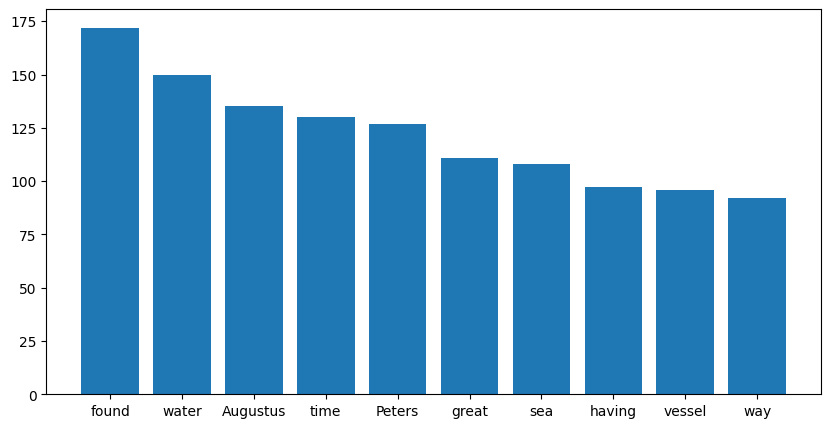

In [72]:
# FIND THE MOST COMMON TOKENS

words = [] # list for words
for token in doc_poe:
    if not token.is_stop and not token.is_punct and token.text.isalpha():
        words.append(token.text)

# count frequence of each work in list using Counter

word_freq = Counter(words)

#print the 10 most common words with their frequencies

for word, frequency in word_freq.most_common(10):
    print(f'Word: {word}, Frequency: {frequency}')

# visualzize using a bar plot

plt.figure(figsize =(10, 5)) # create figure and set size

# word_freq.most_common(10) gives us a list of tuples
# zip(*word_freq.most_common(10)), unzips this list into two separate lists: one for words and one for frequencies

plt.bar(*zip(*word_freq.most_common(10)))

plt.show

Lemma: the, Frequency: 5234
Lemma: of, Frequency: 2930
Lemma: be, Frequency: 2593
Lemma: and, Frequency: 2149
Lemma: to, Frequency: 1969
Lemma: a, Frequency: 1536
Lemma: in, Frequency: 1536
Lemma: I, Frequency: 1161
Lemma: we, Frequency: 1098
Lemma: have, Frequency: 951


<function matplotlib.pyplot.show(close=None, block=None)>

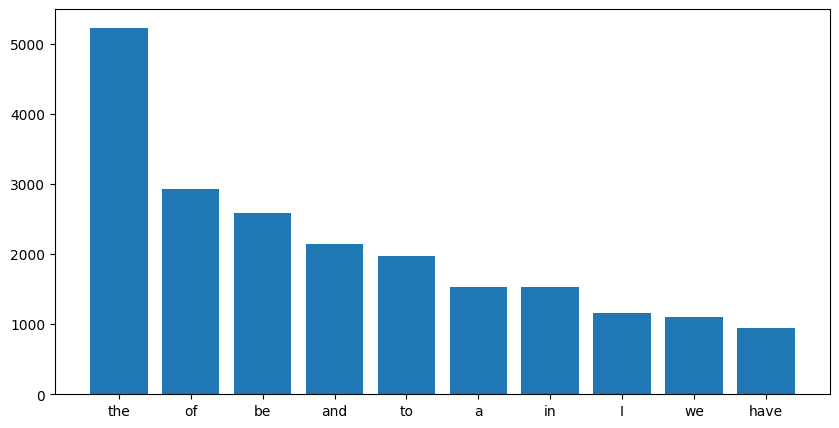

In [76]:
# FIND THE MOST COMMON LEMMAS - words in all of their various forms

lemmas = [] # list for words
for token in doc_poe:
    if token.is_stop and not token.is_punct and token.lemma_.isalpha():
        lemmas.append(token.lemma_)
     

# count frequence of each work in list using Counter

lemma_freq = Counter(lemmas)

#print the 10 most common words with their frequencies

for lemmas, frequency in lemma_freq.most_common(10):
    print(f'Lemma: {lemmas}, Frequency: {frequency}')

# visualzize using a bar plot

plt.figure(figsize =(10, 5)) # create figure and set size

# word_freq.most_common(10) gives us a list of tuples
# zip(*word_freq.most_common(10)), unzips this list into two separate lists: one for words and one for frequencies

plt.bar(*zip(*lemma_freq.most_common(10)))

plt.show

Proper noun: Augustus, Frequency: 135
Proper noun: Peters, Frequency: 127
Proper noun: _, Frequency: 93
Proper noun: Captain, Frequency: 61
Proper noun: Guy, Frequency: 30
Proper noun: Mr., Frequency: 28
Proper noun: Parker, Frequency: 28
Proper noun: Too, Frequency: 23
Proper noun: CHAPTER, Frequency: 21
Proper noun: Tiger, Frequency: 21


<function matplotlib.pyplot.show(close=None, block=None)>

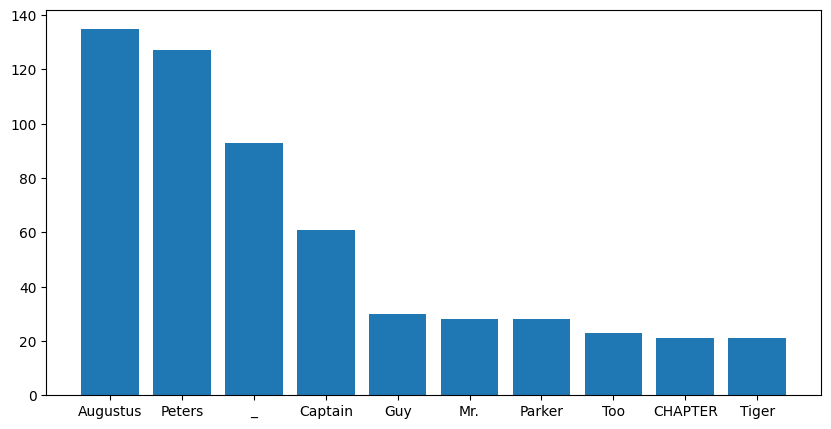

In [77]:
# FIND THE MOST COMMON PROPER NOUNS

proper_nouns = [] # list for words
for token in doc_poe:
    if token.pos_ in ['PROPN']:
        proper_nouns.append(token.text)

# count frequence of each work in list using Counter

proper_noun_freq = Counter(proper_nouns)

#print the 10 most common words with their frequencies

for proper_nouns, frequency in proper_noun_freq.most_common(10):
    print(f'Proper noun: {proper_nouns}, Frequency: {frequency}')

# visualzize using a bar plot

plt.figure(figsize =(10, 5)) # create figure and set size

# word_freq.most_common(10) gives us a list of tuples
# zip(*word_freq.most_common(10)), unzips this list into two separate lists: one for words and one for frequencies

plt.bar(*zip(*proper_noun_freq.most_common(10)))

plt.show

Entity: GPE: Nantucket, Frequency: 11
Entity: NORP: American, Frequency: 7
Entity: PERSON: Peters, Frequency: 112
Entity: ORG: Augustus, Frequency: 23
Entity: LAW: CHAPTER II, Frequency: 1
Entity: CARDINAL: one, Frequency: 113
Entity: WORK_OF_ART: the Messieurs Enderby, Frequency: 2
Entity: FAC: Port, Frequency: 3
Entity: LANGUAGE: English, Frequency: 3
Entity: ORDINAL: first, Frequency: 74
Entity: QUANTITY: fifty feet, Frequency: 5
Entity: PRODUCT: Aurora, Frequency: 2
Entity: LOC: Antarctic, Frequency: 10
Entity: DATE: the day, Frequency: 16
Entity: MONEY: more than
nine miles, Frequency: 1
Entity: TIME: noon, Frequency: 11


) missing from current font.ib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


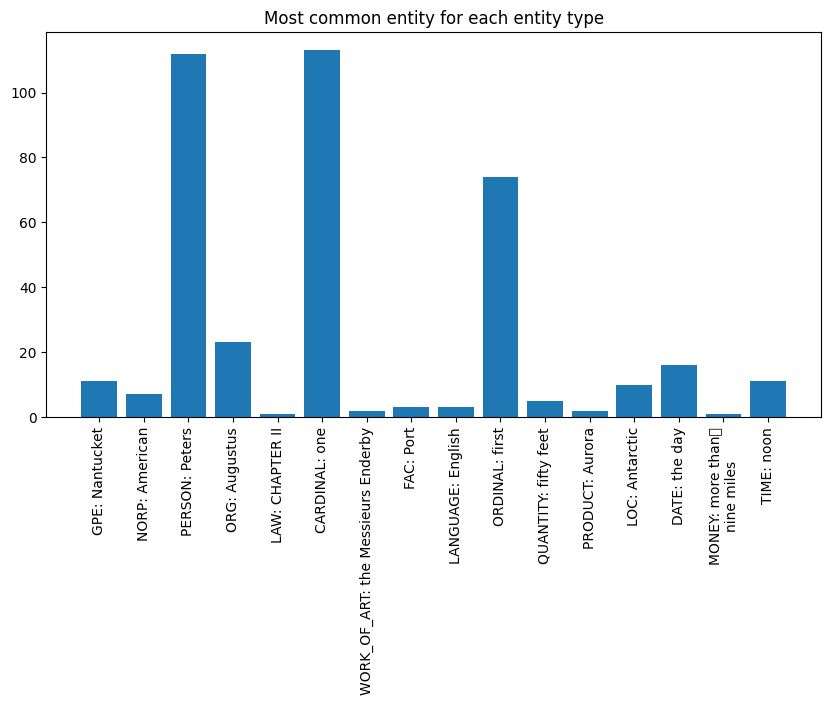

In [78]:
# FIND THE MOST COMMON NAME ENTITIES

# 1. Iterate through all named entities in the document
# 2. Add each named entity to a list as (entity.text, entity.label_)

entities = []  # create an empty list to store the entities
for ent in doc_poe.ents:  # loop over all named entities in the document
    entities.append((ent.text, ent.label_))  # add the entity text and label to the list

# For each entity type, we find the most common entity of that type
most_common_entities = {}  # create an empty dictionary to store the most common entities
for entity_type in set(entity[1] for entity in entities):  # loop over each unique entity type
    # get a Counter of entities of this type
    entities_of_this_type = Counter(entity[0] for entity in entities if entity[1] == entity_type)
    # get the most common entity of this type
    most_common_entity = entities_of_this_type.most_common(1)[0]
    # add it to the dictionary
    most_common_entities[f"{entity_type}: {most_common_entity[0]}"] = most_common_entity[1]

# We can now print the most common entity for each entity type
for entity, frequency in most_common_entities.items():
    print(f"Entity: {entity}, Frequency: {frequency}")

# Let's create a bar plot of the most common entity for each type
plt.figure(figsize=(10,5))  # create a new figure for the plot
plt.bar(most_common_entities.keys(), most_common_entities.values())  # create a bar chart
plt.xticks(rotation=90)  # rotate the x-axis labels for better readability
plt.title("Most common entity for each entity type")  # set the title of the plot
plt.show()  # display the plot